In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Working with Regression Model for better Accuracy

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# Data is converted into numerical values using "DictVectorizer". Below applied

In [3]:
from sklearn.feature_extraction import DictVectorizer

def prepare_data(data, train=True, dv=None):
    cat_keys = [k for k in data.keys() if k.startswith("cat")]
    cat_x = data[cat_keys]
    cont_keys = [k for k in data.keys() if k.startswith("cont")]
    cont_x = data[cont_keys]
    if train:
        y = data["loss"]
    else:
        y = None
    cat_x_dict = [r[1].to_dict() for r in cat_x.iterrows()]
    del cat_x
    if dv is None:
        dv = DictVectorizer().fit(cat_x_dict)
    cat_cont_x = dv.transform(cat_x_dict).toarray()
    del cat_x_dict
    return np.column_stack([cat_cont_x, cont_x]), y, dv

data = pd.read_csv("/content/drive/My Drive/train.csv")
train = pd.read_csv("/content/drive/My Drive/train.csv")
prepare_data(data, train=True, dv=None)

(array([[0.      , 1.      , 0.      , ..., 0.594646, 0.822493, 0.714843],
        [0.      , 0.      , 0.      , ..., 0.366307, 0.611431, 0.304496],
        [0.      , 0.      , 0.      , ..., 0.373424, 0.195709, 0.774425],
        ...,
        [0.      , 0.      , 0.      , ..., 0.443374, 0.339244, 0.503888],
        [0.      , 0.      , 0.      , ..., 0.852865, 0.654753, 0.721707],
        [0.      , 0.      , 0.      , ..., 0.946432, 0.810511, 0.72146 ]]),
 0         2213.18
 1         1283.60
 2         3005.09
 3          939.85
 4         2763.85
            ...   
 188313    1198.62
 188314    1108.34
 188315    5762.64
 188316    1562.87
 188317    4751.72
 Name: loss, Length: 188318, dtype: float64,
 DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
                sparse=True))

In [4]:
train_data = pd.read_csv("/content/drive/My Drive/train.csv").set_index("id")
train_data.head(5)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,...,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,...,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [0]:
train_x, train_y, dv = prepare_data(train_data) 

In [0]:
test_data = pd.read_csv("/content/drive/My Drive/test.csv").set_index("id")
test_x, _, _ = prepare_data(test_data, False, dv)

In [0]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.objectives import MSE, MAE
from keras.callbacks import EarlyStopping

# Define MLP Regression Model and try the compiling it against MAE loss

In [12]:
model = Sequential()
model.add(Dense(input_dim=train_x.shape[1], output_dim=256))
model.add(Activation("tanh"))
model.add(Dropout(0.50))
model.add(Dense(output_dim=128))
model.add(Activation("relu"))
model.add(Dropout(0.50))
model.add(Dense(output_dim=64))
model.add(Activation("relu"))
model.add(Dropout(0.50))
model.add(Dense(output_dim=1))
model.compile("nadam", "mae")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1153, units=256)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=128)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=64)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  # This is added back by InteractiveShellApp.init_path()


In [14]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
train_log = model.fit(train_x, train_y.values, batch_size=256, nb_epoch=40, validation_split=0.1, verbose=2, callbacks=[early_stopping])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 169486 samples, validate on 18832 samples
Epoch 1/40
 - 12s - loss: 1200.3405 - val_loss: 1139.3402
Epoch 2/40
 - 12s - loss: 1198.6436 - val_loss: 1140.5488
Epoch 3/40
 - 12s - loss: 1197.0271 - val_loss: 1146.4251
Epoch 4/40
 - 12s - loss: 1194.5461 - val_loss: 1151.7822
Epoch 5/40
 - 12s - loss: 1194.9256 - val_loss: 1139.1908
Epoch 6/40
 - 12s - loss: 1191.2407 - val_loss: 1137.9774
Epoch 7/40
 - 12s - loss: 1191.5653 - val_loss: 1137.1071
Epoch 8/40
 - 13s - loss: 1186.1826 - val_loss: 1140.9344
Epoch 9/40
 - 13s - loss: 1189.0443 - val_loss: 1137.4132
Epoch 10/40
 - 13s - loss: 1185.7058 - val_loss: 1149.6002
Epoch 11/40
 - 12s - loss: 1182.4438 - val_loss: 1135.0818
Epoch 12/40
 - 13s - loss: 1183.3648 - val_loss: 1139.1651
Epoch 13/40
 - 12s - loss: 1182.1469 - val_loss: 1138.0920
Epoch 14/40
 - 12s - loss: 1180.2188 - val_loss: 1146.4642
Epoch 15/40
 - 12s - loss: 1176.4943 - val_loss: 1136.4989
Epoch 16/40
 - 12s - loss: 1176.4438 - val_loss: 1138.7115
Epoch 17/40
 -

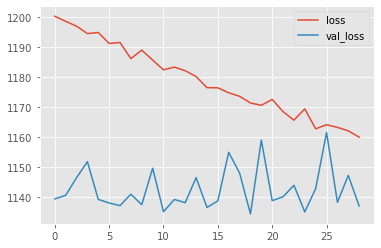

In [15]:
plt.plot(train_log.history["loss"], label="loss")
plt.plot(train_log.history["val_loss"], label="val_loss")
plt.legend()

In [0]:
pred_y = model.predict(test_x)
result = pd.DataFrame(pred_y, index=test_data.index, columns=["loss"])
result.to_csv("Result.csv")